<a href="https://colab.research.google.com/github/pmvdafonseca/filter_iir/blob/main/Filtro_El%C3%ADptico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto de um filtro analógico **elíptico** tipo **passa baixa** com ripple de até 0.5 dB até 2.1 kHz e atenuação superior a 30dB a partir de 8kHz.

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt 
from IPython.display import Audio # Utilizada para emitir formas de onda pelo dispositivo de áudio padrão

In [ ]:
wp = 2.1E3  # Largura da banda de passagem 
ws = 8E3    # Início da banda de rejeição
gpass = 0.5 # Ripple na banda de passagem
gstop = 30  # Atenuação mínima na banda de rejeição

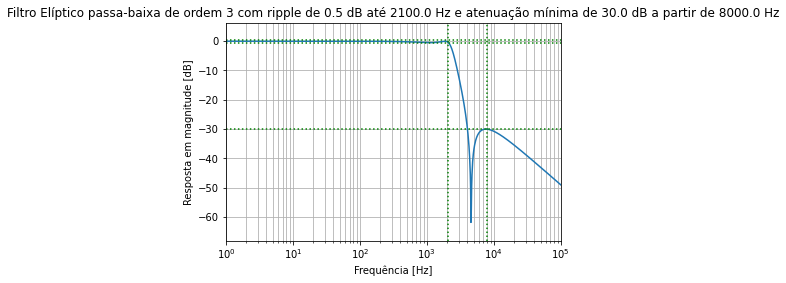

In [ ]:
# Numa primeira tentativa, utiliza-se a estimativa da própria ferramenta para a 
# ordem do filtro. A estimativa de ordem de filtros elípticos é bastante 
# complexa e algoritmos simples de estimação são um tanto grosseiros. 

N, Wn = signal.ellipord(wp,ws,gpass,gstop,analog=True) # Estimativa da ordem mínima do filtro utilizando a função ellipord.

b,a = signal.ellip(N, gpass, gstop, wp, btype='low', analog=True) # Determinação da função de transferência com b=coeficientes do numerador e a=coeficientes do denominador

w, h = signal.freqs(b, a, worN=np.logspace(0, 5, 1000)) # Determinação da resposta em frequência de 10 até 10E5 Hz amostrada em 1000 pontos espaçados de maneira logarítmica

title = "Filtro Elíptico passa-baixa de ordem %d com ripple de %.1f dB até %.1f Hz e atenuação mínima de %.1f dB a partir de %.1f Hz" % (N, gpass, wp, gstop, ws)

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title(title)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Resposta em magnitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wp, color='green',linestyle=':') # 
plt.axvline(ws, color='green',linestyle=':') # 
plt.axhline(-gstop, color='green',linestyle=':') # rs
plt.axhline(-gpass, color='green',linestyle=':') # -rp
plt.axhline(gpass, color='green',linestyle=':') # rp
plt.show()

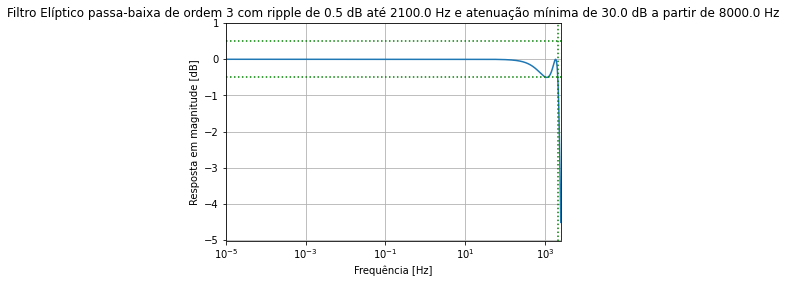

In [ ]:
# Devido à escala do gráfico, não está claro se o filtro satisfaz os requisitos 
# de ripple na banda de passagem. Mostrando a resposta em frequência de 10E-5 
# até 2.5E3 Hz pode esclarecer se esse requisito está sendo cumprido.

w, h = signal.freqs(b, a, worN=np.logspace(-5, np.log10(2.5E3), 1000))

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title(title)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Resposta em magnitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wp, color='green',linestyle=':') # wp
plt.axhline(-gpass, color='green',linestyle=':') # rp
plt.axhline(gpass, color='green',linestyle=':') # rp
plt.show()

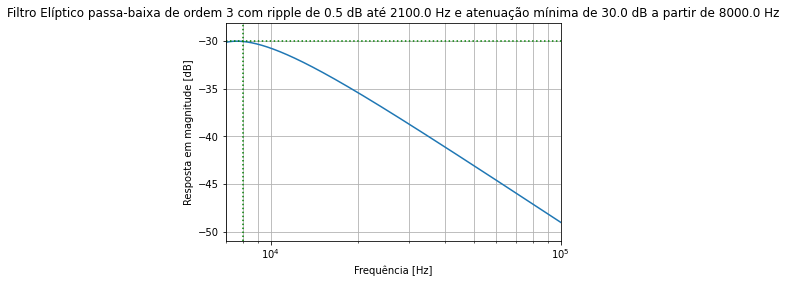

In [ ]:
# Devido à escala do gráfico, não está claro se o filtro satisfaz os requisitos 
# de ripple na banda de rejeição. Mostrando a resposta em frequência de 7E3 
# até 1E5 Hz pode esclarecer se esse requisito está sendo cumprido.

w, h = signal.freqs(b, a, worN=np.logspace(np.log10(7E3), 5, 1000))

plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title(title)
plt.xlabel('Frequência [Hz]')
plt.ylabel('Resposta em magnitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(ws, color='green',linestyle=':') # wr
plt.axhline(-gstop, color='green',linestyle=':') # rs
plt.show()

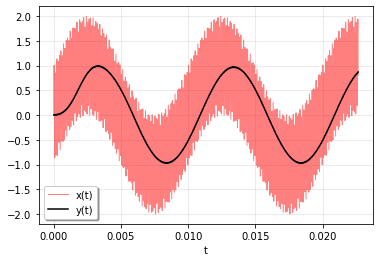

In [ ]:
# Finalmente, pode-se testar o filtro projetado com um par de senóides de 
# frequências na banda de passagem e na banda de rejeição. O filtro deve 
# atenuar severamente a senoide na banda de rejeição e atrasar levemente a 
# senoide na banda de passagem

fs = 44100 

t = np.arange(0,1.0,1.0/fs)

# Criando um sinal de entrada com duas senóides de frequências 100 Hz e 10kHz

x = np.sin(2*np.pi*1E2*t) + np.sin(2*np.pi*1E4*t)

tout, yout, xout = signal.lsim((b, a), U=x, T=t, interp=False)
plt.plot(t[range(1000)], x[range(1000)], 'r', alpha=0.5, linewidth=1, label='x(t)')
plt.plot(tout[range(1000)], yout[range(1000)], 'k', linewidth=1.5, label='y(t)')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.xlabel('t')
plt.show()

In [ ]:
# Áudio pré filtragem
Audio(x,rate=fs)

In [ ]:
# Áudio
Audio(yout,rate=fs)